In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [277]:
!ls

Sample_Submission.csv  SomeMethods.ipynb  Test.csv  Train.csv


In [278]:
df = pd.read_csv('Train.csv', nrows=11856)
df.Datetime = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M')
df = df.set_index('Datetime').drop('ID', axis=1)
df.Count = df.Count.rolling(20).mean()
df = df.dropna()
df.Count = np.sin(np.arange(len(df)) / 70) + np.random.normal(0, 0.1, len(df))

data, test = df[:10392], df[10392:]
data.head()

,Count
Datetime,
2012-08-25 19:00:00,-0.025493
2012-08-25 20:00:00,0.021170
2012-08-25 21:00:00,0.009281
2012-08-25 22:00:00,-0.035459
2012-08-25 23:00:00,0.075704


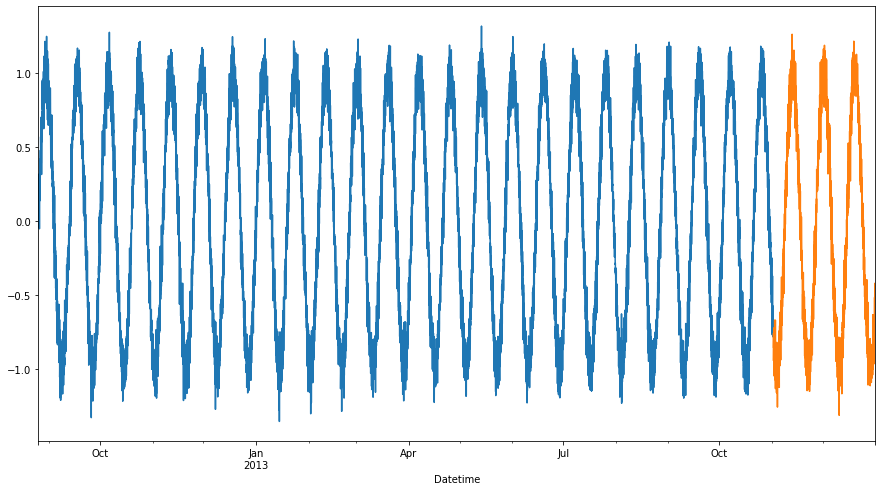

In [279]:
plt.figure(figsize=(15, 8))
data.Count.plot()
test.Count.plot()

In [280]:
for i in range(12, 24 * 3):
    data[f'lag_{i}'] = data.Count.shift(i)
data = data.dropna()
data.head()

,Count,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,...,lag_62,lag_63,lag_64,lag_65,lag_66,lag_67,lag_68,lag_69,lag_70,lag_71
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-08-28 18:00:00,1.010528,0.736467,0.943404,0.755092,0.952516,0.869745,0.655812,0.658579,0.632846,0.537052,...,0.028699,-0.043562,0.316474,0.086119,0.095317,0.075704,-0.035459,0.009281,0.021170,-0.025493
2012-08-28 19:00:00,0.744406,0.844111,0.736467,0.943404,0.755092,0.952516,0.869745,0.655812,0.658579,0.632846,...,0.029803,0.028699,-0.043562,0.316474,0.086119,0.095317,0.075704,-0.035459,0.009281,0.021170
2012-08-28 20:00:00,0.873952,0.780880,0.844111,0.736467,0.943404,0.755092,0.952516,0.869745,0.655812,0.658579,...,-0.019626,0.029803,0.028699,-0.043562,0.316474,0.086119,0.095317,0.075704,-0.035459,0.009281
2012-08-28 21:00:00,0.926557,0.801610,0.780880,0.844111,0.736467,0.943404,0.755092,0.952516,0.869745,0.655812,...,0.226477,-0.019626,0.029803,0.028699,-0.043562,0.316474,0.086119,0.095317,0.075704,-0.035459
2012-08-28 22:00:00,0.624225,0.704396,0.801610,0.780880,0.844111,0.736467,0.943404,0.755092,0.952516,0.869745,...,0.028710,0.226477,-0.019626,0.029803,0.028699,-0.043562,0.316474,0.086119,0.095317,0.075704


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Datetime
2012-11-08 11:00:00    0.375837
2012-11-08 12:00:00    0.364562
2012-11-08 13:00:00    0.468263
2012-11-08 14:00:00    0.455996
2012-11-08 15:00:00    0.466617
                         ...   
2012-12-09 12:00:00   -3.964685
2012-12-09 13:00:00   -3.780980
2012-12-09 14:00:00   -3.595863
2012-12-09 15:00:00   -3.409381
2012-12-09 16:00:00   -3.221583
Length: 750, dtype: float64 Datetime
2012-11-08 11:00:00    0.512332
2012-11-08 12:00:00    0.422493
2012-11-08 13:00:00    0.474827
2012-11-08 14:00:00    0.569316
2012-11-08 15:00:00    0.645269
                         ...   
2012-12-09 12:00:00   -1.025476
2012-12-09 13:00:00   -1.043690
2012-12-09 14:00:00   -1.042553
2012-12-09 15:00:00   -0.971076
2012-12-09 16:00:00   -1.011910
Name: Count, Length: 750, dtype: float64
4.59117606614839


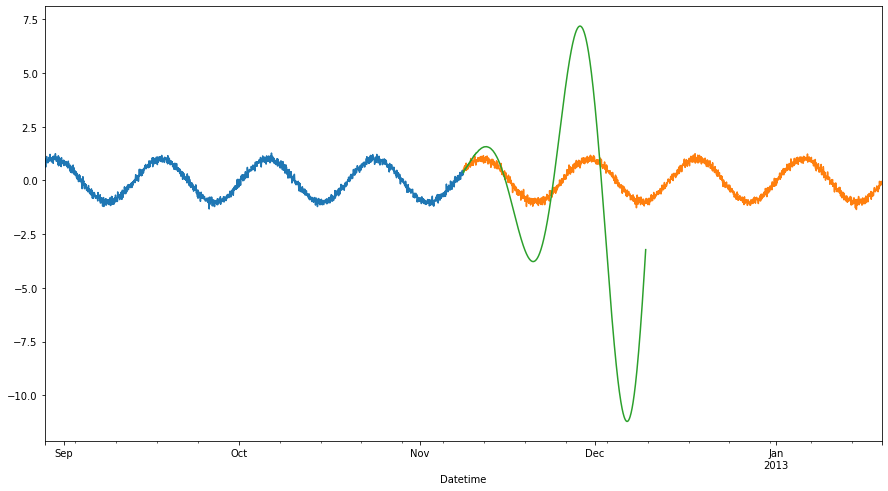

In [284]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator

class SeriesPredictor(BaseEstimator):
    def __init__(self):
        self.model = RandomForestRegressor(20)
        self.model = Ridge()
        print(self.model)
        
    def fit(self, X, y):
        self.X, self.y = X.copy().to_numpy(), y.copy().to_numpy()
        
    def predict(self, count):
        for i in range(count):
            self.model.fit(self.X, self.y)
            next_x = self.X[-1]
            next_x[1:] = next_x[:-1]
            next_x[0] = self.y[-6]
            next_x = next_x[np.newaxis, :]
            self.X = np.concatenate((self.X, next_x))
            pred = self.model.predict(next_x)
            self.y = np.append(self.y, pred)
        return self.y[-count:]
        

plt.figure(figsize=(15, 8))
model = SeriesPredictor()    
model.fit(X.iloc[train], y.iloc[train])
pred = pd.Series(model.predict(750), index=y.iloc[test].index[:750])
print(pred, y.iloc[test][:750])
print(rmse(pred, y.iloc[test][:750]))

y.iloc[train].plot()
y.iloc[test].plot()
pred.plot()

In [281]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

rmse = lambda a, b: mean_squared_error(a, b)**0.5
X, y = data.drop('Count', axis=1), data.Count
print(X, y)

for train, test in TimeSeriesSplit(5).split(data):
    model = SeriesPredictor()
    model.fit(X.iloc[train], y.iloc[train])
    model.predict(len(test))


                       lag_12    lag_13    lag_14    lag_15    lag_16  \
Datetime                                                                
2012-08-28 18:00:00  0.736467  0.943404  0.755092  0.952516  0.869745   
2012-08-28 19:00:00  0.844111  0.736467  0.943404  0.755092  0.952516   
2012-08-28 20:00:00  0.780880  0.844111  0.736467  0.943404  0.755092   
2012-08-28 21:00:00  0.801610  0.780880  0.844111  0.736467  0.943404   
2012-08-28 22:00:00  0.704396  0.801610  0.780880  0.844111  0.736467   
...                       ...       ...       ...       ...       ...   
2013-11-01 14:00:00 -0.522346 -0.566876 -0.540746 -0.543673 -0.248412   
2013-11-01 15:00:00 -0.479917 -0.522346 -0.566876 -0.540746 -0.543673   
2013-11-01 16:00:00 -0.767796 -0.479917 -0.522346 -0.566876 -0.540746   
2013-11-01 17:00:00 -0.570779 -0.767796 -0.479917 -0.522346 -0.566876   
2013-11-01 18:00:00 -0.585706 -0.570779 -0.767796 -0.479917 -0.522346   

                       lag_17    lag_18    lag_19 

KeyboardInterrupt: 

In [22]:
TimeSeriesSplit(X, y)

ValueError: The number of folds must be of Integral type. 0            0
1            1
2            2
3            3
4            4
         ...  
11851    11851
11852    11852
11853    11853
11854    11854
11855    11855
Name: ID, Length: 11856, dtype: int64 of type <class 'pandas.core.series.Series'> was passed.